In [ ]:
import pandas as pd
import numpy as np

In [ ]:
ground_truths = pd.read_csv('ground_truths_nemcova.csv')
nemcova_data = pd.read_csv('nemcova_data.csv')

In [ ]:
nemcova_data.head()

In [ ]:
for i in range(len(nemcova_data['sample_source'])):
    nemcova_data['sample_source'][i] = nemcova_data['sample_source'][i][:32]
nemcova_data.head()

In [ ]:
ground_truths.rename(columns = {'path':'sample_source'}, inplace = True)

In [ ]:
merged_data = pd.merge(nemcova_data, ground_truths, on = 'sample_source', how = 'left')

In [ ]:
merged_data = pd.read_csv('merged_data.csv')

In [ ]:
merged_data.head()

,mean_red,std_red,mean_green,std_green,mean_blue,std_blue,frame,sample_id,sample_source,HR,SpO2
0,232.57672,3.211507,58.689560,2.680604,11.422743,1.399133,0,0,data/nemcova_data/20200329165134,67,96
1,232.58626,3.227342,58.543620,2.686459,11.576931,1.392232,1,0,data/nemcova_data/20200329165134,67,96
2,231.62793,3.354800,56.909832,2.618421,11.841254,1.384937,2,0,data/nemcova_data/20200329165134,67,96
3,229.85297,3.427032,54.868923,2.562196,11.658637,1.371605,3,0,data/nemcova_data/20200329165134,67,96
4,229.35710,3.470576,54.374130,2.574666,11.535156,1.360028,4,0,data/nemcova_data/20200329165134,67,96


In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18172 entries, 0 to 18171
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mean_red       18172 non-null  float64
 1   std_red        18172 non-null  float64
 2   mean_green     18172 non-null  float64
 3   std_green      18172 non-null  float64
 4   mean_blue      18172 non-null  float64
 5   std_blue       18172 non-null  float64
 6   frame          18172 non-null  int64  
 7   sample_id      18172 non-null  int64  
 8   sample_source  18172 non-null  object 
 9   HR             18172 non-null  int64  
 10  SpO2           18172 non-null  int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 1.5+ MB


In [ ]:
merged_data['SpO2'].value_counts()

98    7734
97    3644
99    2968
96    2088
94     696
87     659
95     383
Name: SpO2, dtype: int64

In [ ]:
df_hr = merged_data.drop(['frame', 'sample_id', 'sample_source', 'SpO2'], axis=1)

In [ ]:
df_sp = merged_data.drop(['frame', 'sample_id', 'sample_source', 'HR'], axis=1)

(array([ 696.,    0.,    0.,  472.,   76., 6053., 3916.,  939., 3582.,
        2438.]),
 array([118.00326 , 131.570425, 145.13759 , 158.704755, 172.27192 ,
        185.839085, 199.40625 , 212.973415, 226.54058 , 240.107745,
        253.67491 ]),
 <a list of 10 Patch objects>)

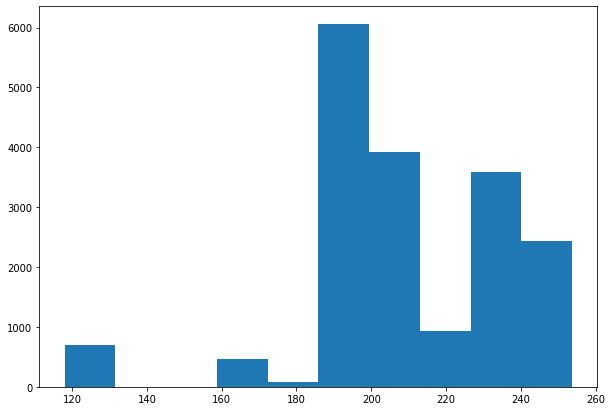

In [ ]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df_sp['mean_red'])

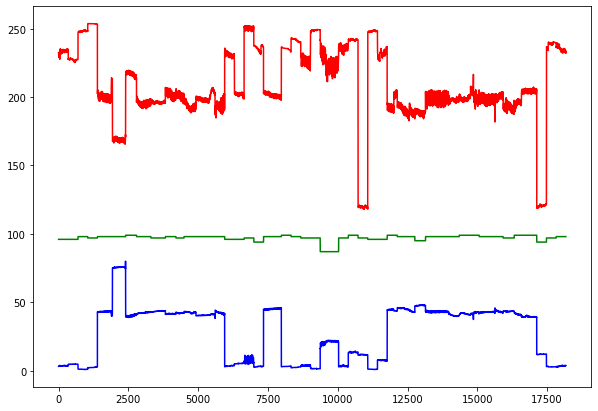

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.plot(df_sp['mean_red'], 'r')
ax.plot(df_sp['std_red'], 'b')
ax.plot(df_sp['SpO2'], 'g')

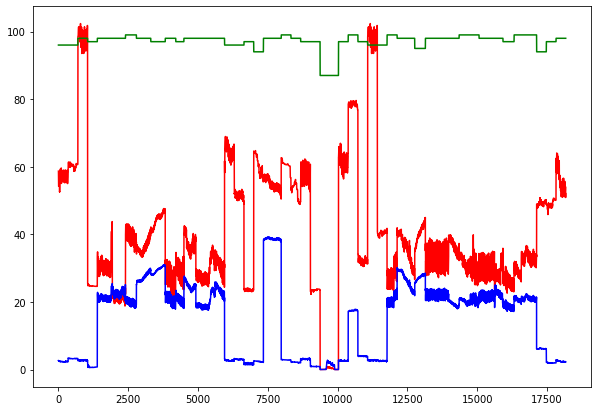

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.plot(df_sp['mean_green'], 'r')
ax.plot(df_sp['std_green'], 'b')
ax.plot(df_sp['SpO2'], 'g')

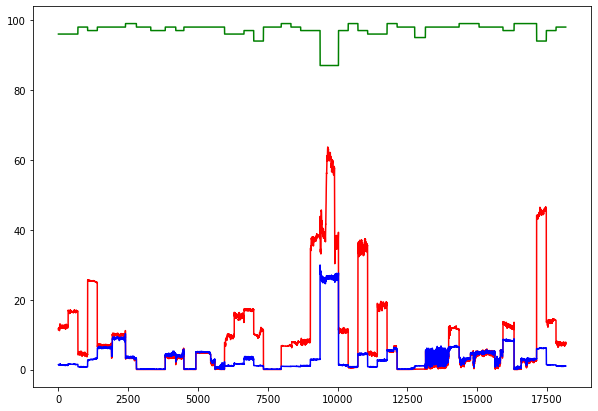

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.plot(df_sp['mean_blue'], 'r')
ax.plot(df_sp['std_blue'], 'b')
ax.plot(df_sp['SpO2'], 'g')

In [ ]:
df_sp.head()

,mean_red,std_red,mean_green,std_green,mean_blue,std_blue,SpO2
0,232.57672,3.211507,58.689560,2.680604,11.422743,1.399133,96
1,232.58626,3.227342,58.543620,2.686459,11.576931,1.392232,96
2,231.62793,3.354800,56.909832,2.618421,11.841254,1.384937,96
3,229.85297,3.427032,54.868923,2.562196,11.658637,1.371605,96
4,229.35710,3.470576,54.374130,2.574666,11.535156,1.360028,96


In [ ]:
import matplotlib.pyplot as plt
X = df_sp.iloc[:, :-1].values
y = df_sp.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
predicted = regressor.predict(X_test)
errors = mean_squared_error(y_test, predicted)
errors

1.3615694842909447

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=5)
x_poly=poly_reg.fit_transform(X_train)
from sklearn.linear_model import LinearRegression
lin_reg2=LinearRegression()
lin_reg2.fit(x_poly,y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
predicted = lin_reg2.predict(poly_reg.fit_transform(X_test))
errors = mean_squared_error(y_test, predicted)
errors

0.08563674361355016

In [ ]:
from sklearn.svm import SVR
svr_reg=SVR(kernel='rbf')
svr_reg.fit(X_train,y_train)

SVR()

In [ ]:
from sklearn.metrics import mean_squared_error
predicted = svr_reg.predict(X_test)
errors = mean_squared_error(y_test, predicted)
errors

0.877730521062012

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 500, random_state = 42)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=42)

In [ ]:
predicted = regressor.predict(X_test)
errors = mean_squared_error(y_test, predicted)
errors

0.09881363400785305

In [ ]:
errors

0.09881363400785305

In [ ]:
regressor.predict([[232.57672, 3.211507, 58.689560, 2.680604, 11.422743, 1.399133]])

array([94.944])

In [ ]:
import pickle
with open('model_pkl', 'wb') as files:
    pickle.dump(regressor, files)

In [ ]:
import cv2
video_name = "name.mp4" # or any other extension like .avi etc
vidcap = cv2.VideoCapture(video_name)
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print(image)
  print('Read a new frame: ', success)
  count += 1

In [ ]:
print(image)

None


In [ ]:
import base64
with open("imageToSave.png", "wb") as fh:
    fh.write(base64.decodebytes(img_data))

In [ ]:
from PIL import Image
import numpy as np
from tabulate import tabulate
import os
arr = np.array(Image.open("name.jpg"))

In [ ]:
arr

In [ ]:
print(arr.shape)

(2240, 4608, 3)


In [ ]:
a = np.average(arr, axis=(0,1))
b = np.std(arr, axis = (0,1))
im = [[a[0], b[0], a[1], b[1], a[2], b[2]]]

In [ ]:
model.predict(im)

array([97.])

In [ ]:
import joblib
model = joblib.load("model_pkl")

In [ ]:
im

[[230.07429741753472,
  12.382710617156725,
  10.141123550657243,
  3.008721777504039,
  33.956456938244045,
  7.067212359572093]]